In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns



df= pd.read_csv(r"D:\TASKS-NALA\master-tasks\Estadistica Aplicada\Parcial01\tarea02\CarPricesPrediction.csv")
df.head(10)


,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022.0,18107.0,Excellent,19094.75
1,Toyota,Silverado,2014.0,13578.0,Excellent,27321.10
2,Chevrolet,Civic,2016.0,46054.0,Good,23697.30
3,Ford,Civic,2022.0,34981.0,Excellent,18251.05
4,Chevrolet,Civic,2019.0,63565.0,Excellent,19821.85
5,Ford,Silverado,2013.0,23600.0,Excellent,27820.00
6,Chevrolet,Silverado,2015.0,89471.0,Good,22526.55
7,Ford,Camry,2014.0,121298.0,Good,21935.10
8,Ford,Altima,2016.0,110691.0,Excellent,20465.45
9,Toyota,Altima,2019.0,112693.0,Excellent,17365.45


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,909.0,2015.844884,3.713757,2010.0,2013.0,2016.0,2019.0,2022.00
Mileage,909.0,78648.289329,37174.329531,12784.0,47483.0,77857.0,109321.0,146622.00
Price,927.0,22219.137540,3981.484014,14197.5,19100.4,22276.8,25392.1,30025.55


In [13]:
print("Valores Faltantes")
df.isnull().sum()


Valores Faltantes


Make          0
Model         0
Year         18
Mileage      18
Condition     0
Price         0
dtype: int64

### Descripción del Dataset

El dataset utilizado en este análisis contiene información sobre los precios de automóviles y sus características asociadas. Aquí hay una breve descripción general del dataset:

**Columnas:** El dataset consta de varias columnas, incluyendo:

*   **Make:** La marca o fabricante del automóvil (ej., Toyota, Honda, Ford).
*   **Model:** El modelo específico del automóvil (ej., Camry, Civic, F-150).
*   **Year:** El año de fabricación del automóvil.
*   **Mileage:** El kilometraje total (en millas) del automóvil.
*   **Condition:** La condición del automóvil, categorizada como Excelente, Buena o Regular.
*   **Price:** El precio del automóvil.

**Tamaño:** El dataset contiene un cierto número de filas, cada una representando una entrada de automóvil única, y un conjunto de columnas que describen varios atributos de los automóviles.

**Fuente:** El dataset fue generado sintéticamente para el propósito de este análisis. Fue creado utilizando un script de Python que simuló los precios de los automóviles basándose en valores aleatorios y factores predefinidos para imitar la variabilidad del mundo real.

**Propósito:** El dataset se utiliza para el análisis exploratorio de datos (EDA) y tareas de modelado. Sirve como un dataset de muestra para demostrar técnicas de análisis de datos, como la limpieza de datos, la visualización y el modelado predictivo, en un contexto de predicción de precios de automóviles.

**Tipos de Datos:** El dataset consta de tipos de datos tanto numéricos como categóricos. Las características numéricas incluyen Year, Mileage y Price, mientras que las características categóricas incluyen Make, Model y Condition.

**Valores Faltantes:** No hay valores faltantes en el dataset, asegurando que el análisis se pueda realizar sin problemas sin la necesidad de imputación o manejo de datos faltantes.

En general, este dataset proporciona una base para analizar y comprender los factores que influyen en los precios de los automóviles, explorar las relaciones entre las características y construir modelos predictivos para estimar los precios de los automóviles basándose en los atributos dados.



In [14]:
# Separar el dataset en variables independientes (X) y dependiente (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Cambiar cada dato faltante por el promedio de la columna

# Imputar valores faltantes en 'Year'
X['Year'].fillna(X['Year'].mean(), inplace=True)

# Imputar valores faltantes en 'Mileage'
X['Mileage'].fillna(X['Mileage'].mean(), inplace=True)


# --- Verificación (Opcional) ---
print("Conteo de nulos en X después de la imputación:")
print(X.isnull().sum())


Conteo de nulos en X después de la imputación:
Make         0
Model        0
Year         0
Mileage      0
Condition    0
dtype: int64


C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\1982197384.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Year'].fillna(X['Year'].mean(), inplace=True)
C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\1982197384.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [15]:
# Imprime la suma de filas no nulas para cada columna
print(df.count())

Make         927
Model        927
Year         909
Mileage      909
Condition    927
Price        927
dtype: int64


In [16]:
# --- Separación de Variables ---
X = df.drop('Price', axis=1)
y = df['Price']


# --- Codificación One-Hot con Scikit-learn ---

# 3. Definir las columnas categóricas y numéricas
categorical_features = ['Make', 'Model', 'Condition']
numerical_features = ['Year', 'Mileage']

# 4. Crear el preprocesador con ColumnTransformer
# Esto aplica OneHotEncoder a las columnas categóricas y deja las numéricas intactas.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Mantiene las columnas no especificadas (numéricas)
)

# 5. Aplicar el preprocesador a X
X_encoded_array = preprocessor.fit_transform(X)

# 6. Reconstruir el DataFrame (opcional, pero bueno para la inspección)
# Obtener los nuevos nombres de las columnas generadas por OneHotEncoder
new_categorical_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combinar todos los nombres de las columnas en el orden correcto
all_cols = list(new_categorical_cols) + numerical_features

# Crear el DataFrame final
X_encoded = pd.DataFrame(X_encoded_array, columns=all_cols, index=X.index)


# --- Verificación de Resultados ---
print("--- DataFrame con One-Hot Encoding (primeras 5 filas) ---")
print(X_encoded.head())

print(f"\nDimensiones originales de X: {X.shape}")
print(f"Dimensiones de X después del One-Hot Encoding: {X_encoded.shape}")



--- DataFrame con One-Hot Encoding (primeras 5 filas) ---
   Make_Ford  Make_Honda  Make_Nissan  Make_Toyota  Model_Camry  Model_Civic  \
0        1.0         0.0          0.0          0.0          0.0          0.0   
1        0.0         0.0          0.0          1.0          0.0          0.0   
2        0.0         0.0          0.0          0.0          0.0          1.0   
3        1.0         0.0          0.0          0.0          0.0          1.0   
4        0.0         0.0          0.0          0.0          0.0          1.0   

   Model_F-150  Model_Silverado  Condition_Fair  Condition_Good    Year  \
0          0.0              1.0             0.0             0.0  2022.0   
1          0.0              1.0             0.0             0.0  2014.0   
2          0.0              0.0             0.0             1.0  2016.0   
3          0.0              0.0             0.0             0.0  2022.0   
4          0.0              0.0             0.0             0.0  2019.0   

   Mileage

In [17]:
%matplotlib inline

C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\526717879.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order = df[col].value_counts().index)
C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\526717879.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order = df[col].value_counts().index)
C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\526717879.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], pale

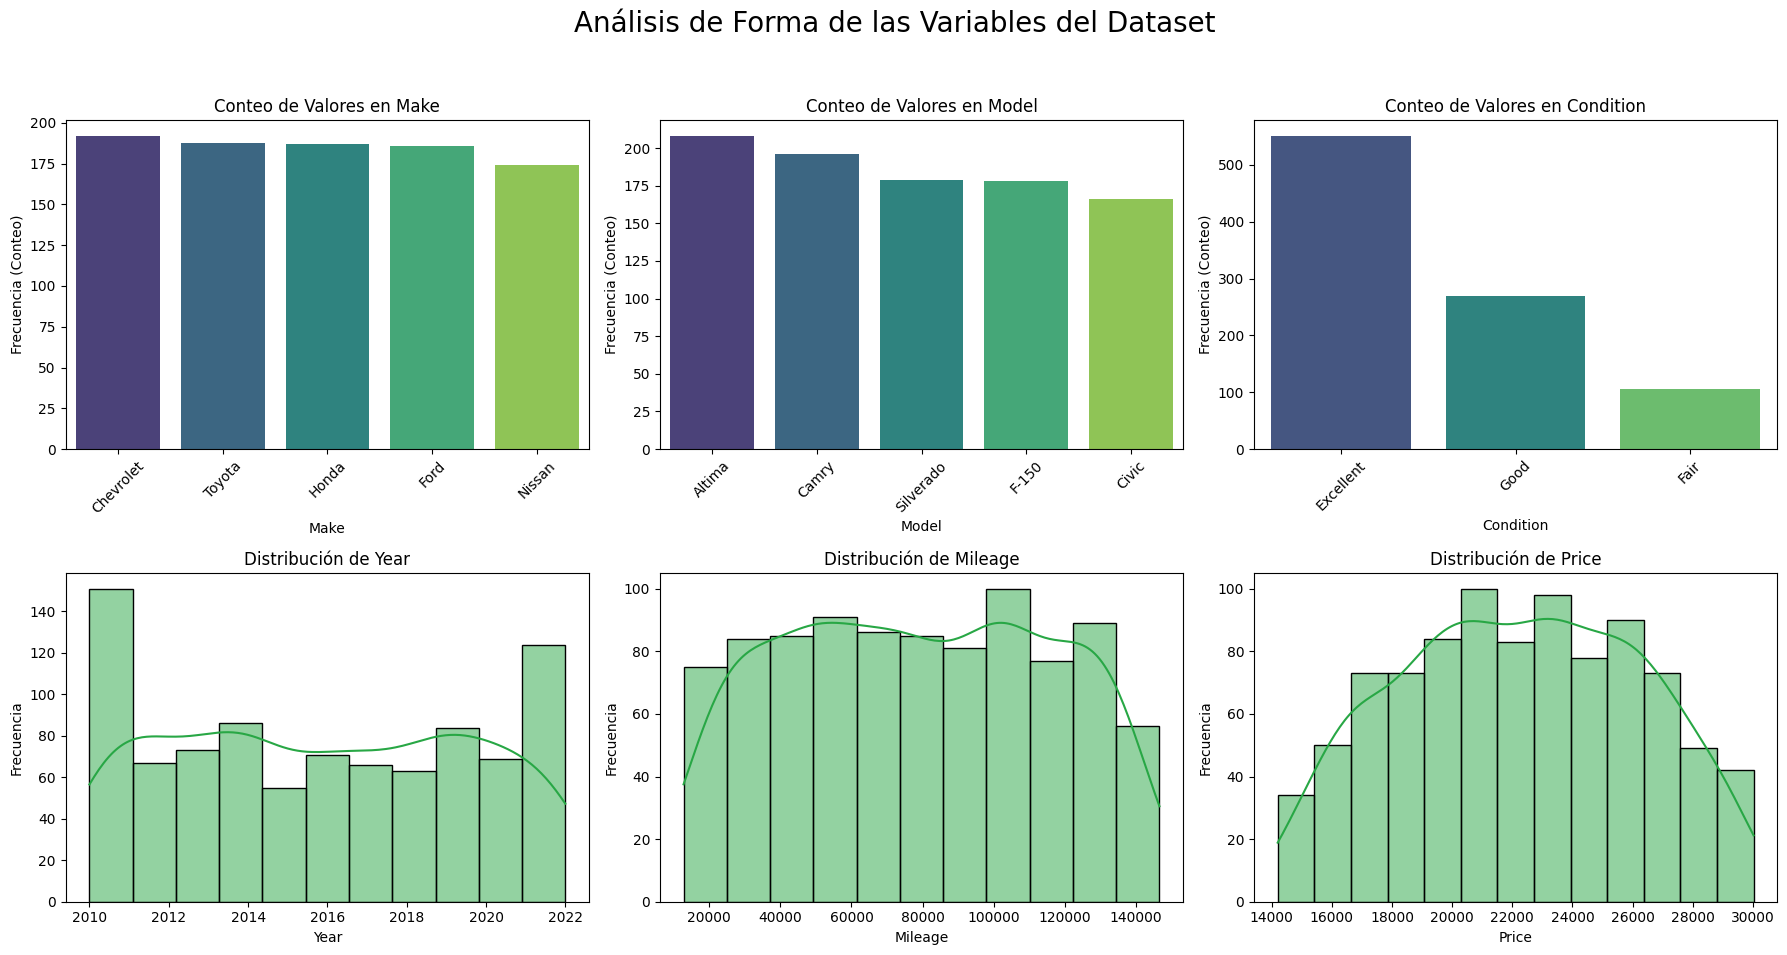

In [24]:
# 3. Identificar automáticamente las columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

# 4. Crear la figura y los subplots (2 filas, 3 columnas para las 6 variables)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Análisis de Forma de las Variables del Dataset', fontsize=20)

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 5. Generar gráficos de conteo para variables categóricas
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order = df[col].value_counts().index)
    axes[i].set_title(f'Conteo de Valores en {col}')
    axes[i].set_ylabel('Frecuencia (Conteo)')
    axes[i].tick_params(axis='x', rotation=45)

# 6. Generar histogramas para variables numéricas
# El índice del subplot continúa donde terminó el bucle anterior
start_index = len(categorical_cols)
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[start_index + i], color='#28A745')
    axes[start_index + i].set_title(f'Distribución de {col}')
    axes[start_index + i].set_ylabel('Frecuencia')


# 7. Ajustar el diseño y mostrar
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()





--- Análisis de Sesgo y Curtosis de Variables Numéricas ---
        Variable  Sesgo (Skewness)  Curtosis (Kurtosis)
Year        Year          0.034823            -1.236369
Mileage  Mileage          0.005916            -1.170685
Price      Price         -0.031180            -0.955119

--- Interpretación ---
Sesgo (Skewness): cercano a 0 indica simetría.
Curtosis (Kurtosis): negativo indica una distribución plana (platicúrtica).


C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\45379031.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df['Variable'], y=results_df['Sesgo (Skewness)'], ax=axes[0], palette='viridis')
C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\45379031.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df['Variable'], y=results_df['Curtosis (Kurtosis)'], ax=axes[1], palette='plasma')


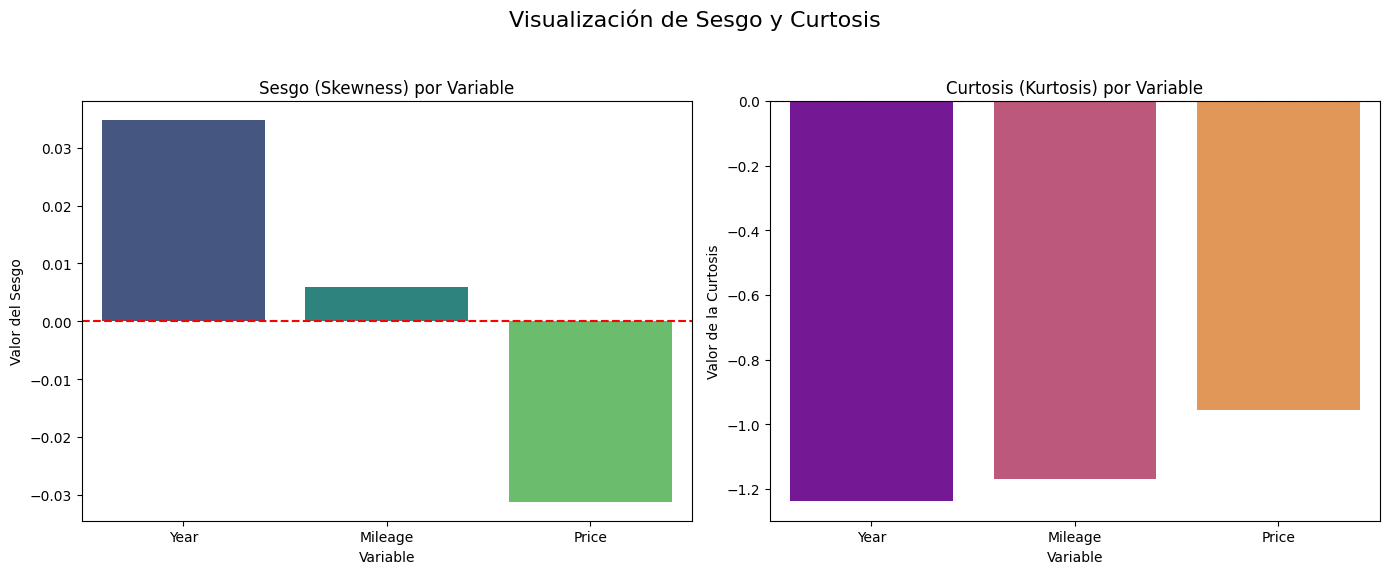

In [21]:
import seaborn as sns
# 3. Seleccionar solo las columnas numéricas para el análisis
numerical_cols = df.select_dtypes(include=['number']).columns

# 4. Calcular el sesgo (skewness) y la curtosis (kurtosis)
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurtosis()

# 5. Crear un DataFrame para mostrar los resultados de forma clara
results_df = pd.DataFrame({
    'Variable': numerical_cols,
    'Sesgo (Skewness)': skewness,
    'Curtosis (Kurtosis)': kurtosis
})

# --- Impresión de Resultados y Conclusiones ---

print("\n--- Análisis de Sesgo y Curtosis de Variables Numéricas ---")
print(results_df)

print("\n--- Interpretación ---")
print("Sesgo (Skewness): cercano a 0 indica simetría.")
print("Curtosis (Kurtosis): negativo indica una distribución plana (platicúrtica).")


# --- Visualización de Sesgo y Curtosis ---

# 6. Crear una figura con dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Visualización de Sesgo y Curtosis', fontsize=16)

# Gráfico para el Sesgo
sns.barplot(x=results_df['Variable'], y=results_df['Sesgo (Skewness)'], ax=axes[0], palette='viridis')
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set_title('Sesgo (Skewness) por Variable')
axes[0].set_ylabel('Valor del Sesgo')
axes[0].set_xlabel('Variable')

# Gráfico para la Curtosis
sns.barplot(x=results_df['Variable'], y=results_df['Curtosis (Kurtosis)'], ax=axes[1], palette='plasma')
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title('Curtosis (Kurtosis) por Variable')
axes[1].set_ylabel('Valor de la Curtosis')
axes[1].set_xlabel('Variable')

# Ajustar diseño y mostrar los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [22]:
profile = ProfileReport(df_plot, title = "Reporte de Analisis Exploratorio de los Datos CarPrice", )
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 328.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\759713083.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Price', data=df, ax=axes[i], palette='viridis')
C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\759713083.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Price', data=df, ax=axes[i], palette='viridis')
C:\Users\crasc\AppData\Local\Temp\ipykernel_17384\759713083.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Price', data=df, ax=axes[i], palette='viridis')
C:\Users\crasc\AppData\Local\Temp\

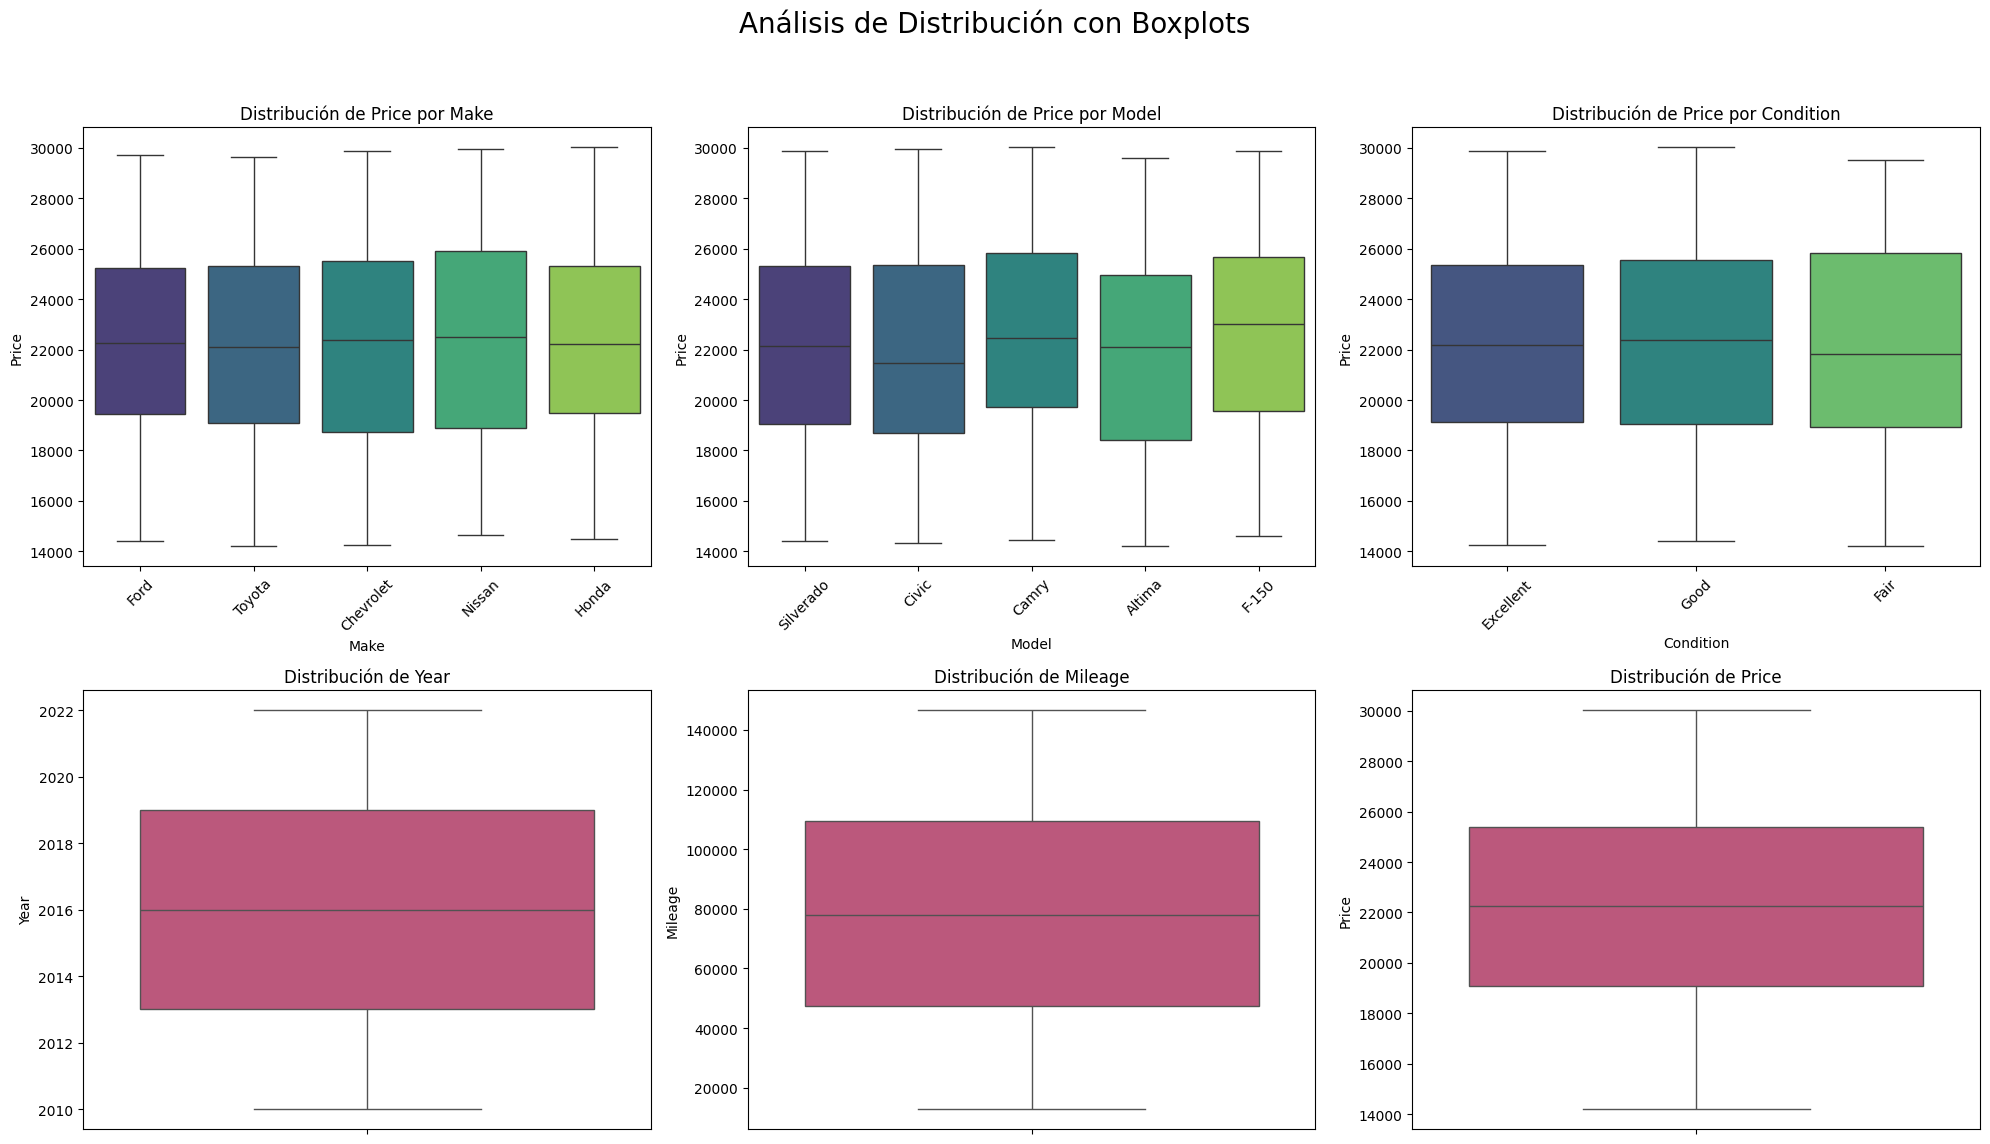

In [23]:
# --- Creación de Gráficos de Boxplot ---

# 3. Definir las columnas a graficar
categorical_cols = ['Make', 'Model', 'Condition']
numerical_cols = ['Year', 'Mileage', 'Price']

# 4. Crear la figura y los subplots (2 filas, 3 columnas)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('Análisis de Distribución con Boxplots', fontsize=20)

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# 5. Generar boxplots para variables categóricas vs. Price
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='Price', data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de Price por {col}')
    axes[i].tick_params(axis='x', rotation=45) # Rotar etiquetas para mejor lectura

# 6. Generar boxplots para variables numéricas
for i, col in enumerate(numerical_cols):
    # La posición en el subplot continúa donde terminaron los categóricos
    ax_index = i + len(categorical_cols)
    sns.boxplot(y=col, data=df, ax=axes[ax_index], palette='plasma')
    axes[ax_index].set_title(f'Distribución de {col}')


# 7. Ajustar el diseño y mostrar
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
